# Setup

Use pip to download and install the necessary libraries if needed

In [ ]:
!pip install --upgrade pma_python
!pip install pprint
!pip install easygui

Import libraries and set connection parameters

In [1]:
# helper libraries
import pprint as pp    # pretty print library is better to print list and dictionary structures
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import easygui

# pma_python
from pma_python import core
print("pma_python library loaded; version", core.__version__)

# connection parameters to be used throughout this notebook
pma_core_server = "https://host.pathomation.com/sandbox/2/PMA.core"
creds = easygui.multpasswordbox('Server = ' + pma_core_server, 'Credentials', ["username", "password"])
pma_core_user = creds[0]
pma_core_pass = creds[1]
pma_core_slide_dir = "hgx_cases"

if not core.is_lite(pma_core_server):
    print ("PMA.core found. Good")
else:
    raise Exception("Unable to detect PMA.core! Please update configuration parameters in this block")

pma_python library loaded; version 2.0.0.114
PMA.core found. Good


In [2]:
# only needed when debugging code for extra error messages:
core.set_debug_flag(True)

Debug flag enabled. You will receive extra feedback and messages from pma_python (like this one)


# PMA.core examples

example 10: identifying PMA.core

In [3]:
# testing actual "full" PMA.core instance that may or may not be out there
print("Are you running PMA.core at ", pma_core_server , "?", not core.is_lite(pma_core_server))
# testing PMA.core at non-sense location
print("Are you running PMA.core at http://nowhere ?", core.is_lite("http://nowhere"));

Are you running PMA.core at  https://host.pathomation.com/sandbox/2/PMA.core ? True
Are you running PMA.core at http://nowhere ? None


example 20: getting version information about PMA.core

In [4]:
# assuming we have PMA.core running; what's the version number?
print("Investigating", pma_core_server)
print("You are running PMA.core version", core.get_version_info(pma_core_server))

version = core.get_version_info("http://nowhere");
print (version)
if (version == None):
	print("Unable to detect PMA.core at specified location (http://nowhere/)")
else:
	print("You are running PMA.core version", version);

Investigating https://host.pathomation.com/sandbox/2/PMA.core
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetVersionInfo
You are running PMA.core version 2.0.0.1386
http://nowhere/api/json/GetVersionInfo
None
Unable to detect PMA.core at specified location (http://nowhere/)


In [5]:
version = core.get_api_version(pma_core_server)
pp.pprint(version)

https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetAPIVersion


Exception: GetAPIVersion method not available at https://host.pathomation.com/sandbox/2/PMA.core

In [ ]:
core.get_api_verion_string(pma_core_server)

example 30: connect to PMA.core

In [7]:
sessionID = core.connect(pma_core_server, pma_core_user, pma_core_pass)	

if (sessionID == None):
    print("Unable to connect to PMA.core");
    print(pma_core_user, "was unable to connect to", pma_core_server, " with password =", pma_core_pass)
else:
    print("Successfully connected to PMA.core; sessionID", sessionID)

https://host.pathomation.com/sandbox/2/PMA.core/api/json/authenticate?caller=SDK.Python&username=pma_admin&password=P4th0-M4t%21on
Successfully connected to PMA.core; sessionID YrBskPyBjvC6Kk0iY084Tg2


example 40: getting root-directories from PMA.core

In [8]:
print("You have the following root-directories on your system: ")
rootdirs = core.get_root_directories(sessionID)
pp.pprint(rootdirs)

You have the following root-directories on your system: 
['hgx_cases']


example 50: disconnect from PMA.core

In [9]:
sessionID = core.connect(pma_core_server, pma_core_user, pma_core_pass)	
pp.pprint(core.who_am_i(sessionID))
print()

core.disconnect(sessionID)
try:
    pp.pprint(core.who_am_i(sessionID))
    print()
except:
    print("Unable to identify you. Are you connected to the PMA.core instance? Is that a valid sessionID?")
print()
    
sessionID = core.connect(pma_core_server, pma_core_user, pma_core_pass)	
pp.pprint(core.who_am_i(sessionID))

https://host.pathomation.com/sandbox/2/PMA.core/api/json/authenticate?caller=SDK.Python&username=pma_admin&password=P4th0-M4t%21on
{'amountOfDataDownloaded': 8,
 'sessionID': 'YrBskPyBjvC6Kk0iY084Tg2',
 'url': 'https://host.pathomation.com/sandbox/2/PMA.core/',
 'username': 'pma_admin'}

Unable to identify you. Are you connected to the PMA.core instance? Is that a valid sessionID?

https://host.pathomation.com/sandbox/2/PMA.core/api/json/authenticate?caller=SDK.Python&username=pma_admin&password=P4th0-M4t%21on
{'amountOfDataDownloaded': 8,
 'sessionID': 'K1bn7uUDjwAox_EYz6Cfyw2',
 'url': 'https://host.pathomation.com/sandbox/2/PMA.core/',
 'username': 'pma_admin'}


example 60: getting directories from PMA.core

In [10]:
rootdirs = core.get_root_directories(sessionID);
print("Directories found in ", rootdirs[0],":")

dirs = core.get_directories(rootdirs[0], sessionID)
pp.pprint(dirs)

Directories found in  hgx_cases :
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases
['hgx_cases/bladder', 'hgx_cases/breast', 'hgx_cases/lung']


example 70: get first non empty directory PMA.core

In [11]:
slide_dir = core.get_first_non_empty_directory()
print (slide_dir)

hgx_cases


example 80: getting slides PMA.core

In [12]:
slide_dir = pma_core_slide_dir
print("Looking for slides in " + slide_dir)
print()

print ("**Non-recursive:")
print(core.get_slides(slide_dir))

print ("\n**One-level deep recursion:")
print(core.get_slides(slide_dir, recursive = 1))

print ("\n**Full recursion:")
print(core.get_slides(slide_dir, recursive = True))

Looking for slides in hgx_cases

**Non-recursive:
['hgx_cases/CMU-1 - Copy.svs', 'hgx_cases/CMU-1.mrxs', 'hgx_cases/CMU-1.ndpi', 'hgx_cases/CMU-1.svs', 'hgx_cases/CMU-1.tiff']

**One-level deep recursion:
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases
['hgx_cases/CMU-1 - Copy.svs', 'hgx_cases/CMU-1.mrxs', 'hgx_cases/CMU-1.ndpi', 'hgx_cases/CMU-1.svs', 'hgx_cases/CMU-1.tiff']

**Full recursion:
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder%2F10440001B
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder%2F1

example 90: get UID for a slide in PMA.core

In [13]:
slide_dir = pma_core_slide_dir

print("Looking for slides in", slide_dir)
print()

for slide in core.get_slides(slide_dir):
	print (slide," - ", core.get_uid(slide))

Looking for slides in hgx_cases

hgx_cases/CMU-1 - Copy.svs  -  2WOL45NMPG
hgx_cases/CMU-1.mrxs  -  GHFS2OOW3A
hgx_cases/CMU-1.ndpi  -  4TPGM8PTU6
hgx_cases/CMU-1.svs  -  IW09NL2QMZ
hgx_cases/CMU-1.tiff  -  XCJ514K7WS


example 100: get fingerprint in PMA.core

In [14]:
slide_dir = pma_core_slide_dir

print("Looking for slides in " + slide_dir)
print()

for slide in core.get_slides(slide_dir):
	print (slide," - ", core.get_fingerprint(slide))

Looking for slides in hgx_cases

hgx_cases/CMU-1 - Copy.svs  -  LPQNz3P4552cuyOL85pq6x3kp8g1
hgx_cases/CMU-1.mrxs  -  YrbDCBwr7NlIk50AGFzGODC5IAQ1
hgx_cases/CMU-1.ndpi  -  Md4pg_Auai6QxoZslpjEBis4Las1
hgx_cases/CMU-1.svs  -  LPQNz3P4552cuyOL85pq6x3kp8g1
hgx_cases/CMU-1.tiff  -  i9l1C4tAhnsUHjUHNmNOmmjm1EE1


example 110: SlideInfo PMA.core

In [15]:
slide_dir = pma_core_slide_dir
print("Looking for slides in", slide_dir)
print()

for slide in core.get_slides(slide_dir):
    print("***", slide)
    try:
        pp.pprint(core.get_slide_info(slide))
    except:
        print("**Unable to get slide info from this one")

Looking for slides in hgx_cases

*** hgx_cases/CMU-1 - Copy.svs
{'AnnotationsLayers': [],
 'AssociatedImageTypes': ['Thumbnail', 'Barcode'],
 'BackgroundColor': 'ffffff',
 'BaseUrl': 'https://host.pathomation.com/sandbox/2/PMA.core/',
 'DefaultGamma': 1,
 'ErrorMessage': None,
 'Filename': 'hgx_cases/CMU-1 - Copy.svs',
 'Height': 32914,
 'LastModified': '/Date(1560853372000)/',
 'MaxZoomLevel': 7,
 'MetaData': [{'Name': 'compression', 'Value': 'JpegTechnote2'},
              {'Name': 'fileformat', 'Value': 'Aperio SVS'}],
 'MicrometresPerPixelX': 0.499,
 'MicrometresPerPixelY': 0.499,
 'PhysicalSize': 177552579,
 'TileSize': 512,
 'TimeFrames': [{'Layers': [{'Channels': [{'ChannelID': 0,
                                           'Color': 'ffffffff',
                                           'Name': 'Default'}],
                             'LayerID': 0}],
                 'TimeID': 0}],
 'UID': '2WOL45NMPG',
 'Width': 46000}
*** hgx_cases/CMU-1.mrxs
{'AnnotationsLayers': [],
 'Associ

example 120: slide dimensions PMA.core

In [16]:
slide_dir = pma_core_slide_dir

for slide in core.get_slides(slide_dir):
    print("[" + slide + "]")
    try:
        xdim_pix, ydim_pix = core.get_pixel_dimensions(slide)
        xdim_phys, ydim_phys = core.get_physical_dimensions(slide)

        print("Pixel dimensions of slide: ", end="")
        print(xdim_pix, "x", ydim_pix)

        print("Slide surface area represented by image: ", end="")
        print(str(xdim_phys) + "µm x " + str(ydim_phys) + "µm = ", end="")
        print(xdim_phys * ydim_phys / 1E6, " mm2")
        
    except:
        print("**Unable to parse", slide)

[hgx_cases/CMU-1 - Copy.svs]
Pixel dimensions of slide: 46000 x 32914
Slide surface area represented by image: 22954.0µm x 16424.086µm = 376.998470044  mm2
[hgx_cases/CMU-1.mrxs]
Pixel dimensions of slide: 68608 x 95232
Slide surface area represented by image: 15951.36µm x 22141.440000000002µm = 353.18608035840003  mm2
[hgx_cases/CMU-1.ndpi]
Pixel dimensions of slide: 51200 x 38144
Slide surface area represented by image: 23368.324965769054µm x 17357.906712172924µm = 405.6252047755608  mm2
[hgx_cases/CMU-1.svs]
Pixel dimensions of slide: 46000 x 32914
Slide surface area represented by image: 22954.0µm x 16424.086µm = 376.998470044  mm2
[hgx_cases/CMU-1.tiff]
Pixel dimensions of slide: 46000 x 32914
Slide surface area represented by image: 46000000.0µm x 32914000.0µm = 1514044000.0  mm2


example 130: get all files that make up a particular slide

In [17]:
for slide in core.get_slides(pma_core_slide_dir):
    print(slide);
    pp.pprint(core.get_files_for_slide(slide))

hgx_cases/CMU-1 - Copy.svs
{'hgx_cases/CMU-1 - Copy.svs': {'LastModified': '/Date(1560853372000)/',
                                'Size': 177552579}}
hgx_cases/CMU-1.mrxs
{'hgx_cases/CMU-1.mrxs': {'LastModified': '/Date(1560855163000)/',
                          'Size': 73531},
 'hgx_cases/CMU-1/Data0000.dat': {'LastModified': '/Date(1560855163000)/',
                                  'Size': 725},
 'hgx_cases/CMU-1/Data0001.dat': {'LastModified': '/Date(1560855163000)/',
                                  'Size': 725},
 'hgx_cases/CMU-1/Data0002.dat': {'LastModified': '/Date(1560855163000)/',
                                  'Size': 77021},
 'hgx_cases/CMU-1/Data0003.dat': {'LastModified': '/Date(1560855163000)/',
                                  'Size': 56786},
 'hgx_cases/CMU-1/Data0004.dat': {'LastModified': '/Date(1560855165000)/',
                                  'Size': 394278767},
 'hgx_cases/CMU-1/Data0005.dat': {'LastModified': '/Date(1560855163000)/',
                  

example 140: who are you in PMA.core

In [ ]:
core.who_am_i()

example 150: investigate zoomlevels PMA.core

In [18]:
slide_dir = pma_core_slide_dir

for slide in core.get_slides(slide_dir):
    print("***", slide)
    print("  max zoomlevel:", core.get_max_zoomlevel(slide))
    print("  zoomlevel list:")
    pp.pprint(core.get_zoomlevels_list(slide))
    print("  zoomlevel dictionary:")
    pp.pprint(core.get_zoomlevels_dict(slide))

*** hgx_cases/CMU-1 - Copy.svs
  max zoomlevel: 7
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (3, 3, 9),
 3: (6, 5, 30),
 4: (12, 9, 108),
 5: (23, 17, 391),
 6: (45, 33, 1485),
 7: (90, 65, 5850)}
*** hgx_cases/CMU-1.mrxs
  max zoomlevel: 8
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7, 8]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (3, 3, 9),
 3: (5, 6, 30),
 4: (9, 12, 108),
 5: (17, 24, 408),
 6: (34, 47, 1598),
 7: (67, 93, 6231),
 8: (134, 186, 24924)}
*** hgx_cases/CMU-1.ndpi
  max zoomlevel: 7
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (4, 3, 12),
 3: (7, 5, 35),
 4: (13, 10, 130),
 5: (25, 19, 475),
 6: (50, 38, 1900),
 7: (100, 75, 7500)}
*** hgx_cases/CMU-1.svs
  max zoomlevel: 7
  zoomlevel list:
[0, 1, 2, 3, 4, 5, 6, 7]
  zoomlevel dictionary:
{0: (1, 1, 1),
 1: (2, 2, 4),
 2: (3, 3, 9),
 3: (6, 5, 30),
 4: (12, 9, 108),
 5: (23, 17, 391),
 6: (45, 3

example 160: investigate magnification and other characteristics PMA.core

In [ ]:
slide_dir = pma_core_slide_dir

slide_infos = []     # create blank list (to be converted into a pandas DataFrame later)

for slide in core.get_slides(slide_dir):
	dict = {
		"slide": core.get_slide_file_name(slide),
		"approx_mag": core.get_magnification(slide, exact=False),
		"exact_mag": core.get_magnification(slide, exact=True),
		"is_fluo": core.is_fluorescent(slide),
		"is_zstack": core.is_z_stack(slide)
		}
	slide_infos.append(dict)
	
df_slides = pd.DataFrame(slide_infos, columns=["slide","approx_mag","exact_mag", "is_fluo", "is_zstack"])
print(df_slides)


example 170: get barcode from slide in PMA.core

In [19]:
for slide in core.get_slides(pma_core_slide_dir, recursive=True):
    print(slide, " - ", core.get_barcode_text(slide))

https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder%2F10440001B
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder%2F10440002B
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder%2F10440003B
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder%2F10440004B
https://host.pathomation.com/sandbox/2/PMA.core/api/json/GetDirectories?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases%2Fbladder%2F10440005B
https://host.pathomation.com/sand

hgx_cases/breast/06420915B/PR_06420915B0008S.mrxs  -  ['195058']
hgx_cases/breast/06421000B/HE_06421000B0001S.mrxs  -  ['552105221112', '06421000B0001S']
hgx_cases/breast/06421001B/HE_06421001B0001S.mrxs  -  ['06421001B0001S']
hgx_cases/breast/06421001B/HE_06421001B0023S.mrxs  -  ['06421001B0023S']
hgx_cases/lung/05850002B/HE_05850002B0001S.mrxs  -  ['05850002B0001S']
hgx_cases/lung/05850002B/PDL1_05850002B0012S.mrxs  -  []
hgx_cases/lung/05850003B/HE_05850003B0001S.mrxs  -  ['05850003B0001S']
hgx_cases/lung/05850003B/PDL1_05850003B0012S.mrxs  -  []
hgx_cases/lung/05850004B/HE_05850004B0001S.mrxs  -  ['05850004B0001S']
hgx_cases/lung/05850004B/PDL1_05850004B0016S.mrxs  -  []
hgx_cases/lung/05850005B/HE_05850005B0001S.mrxs  -  ['05850005B0001S']
hgx_cases/lung/05850005B/PDL1_05850005B0013S.mrxs  -  []
hgx_cases/lung/05850006B/HE_05850006B0001S.mrxs  -  []
hgx_cases/lung/05850006B/PanCK-CD8_05850006B0003S.mrxs  -  ['071215']
hgx_cases/lung/05850006B/PDL1_05850006B0002S.mrxs  -  []
hgx_ca

example 180: show a slide through PMA.core

In [20]:
slides = core.get_slides(pma_core_slide_dir)
core.show_slide(slides[0])

https://host.pathomation.com/sandbox/2/PMA.core/viewer/index.htm?sessionID=K1bn7uUDjwAox_EYz6Cfyw2^&pathOrUid=hgx_cases%2FCMU-1%20-%20Copy.svs


example 190: slide label (URL) in PMA.core

https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1%20-%20Copy.svs
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.mrxs
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.ndpi
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.svs
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.tiff


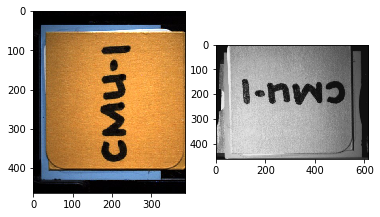

In [21]:
all_slides = core.get_slides(pma_core_slide_dir)
for sl in all_slides:
    print(core.get_label_url(sl))
plt.subplot(1, 2, 1)
plt.imshow(core.get_label_image(all_slides[0]))
plt.subplot(1, 2, 2)
plt.imshow(core.get_label_image(all_slides[1]))

example 200: slide label (URL) in PMA.core (using barcode alias methods)

https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1%20-%20Copy.svs
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.mrxs
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.ndpi
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.svs
https://host.pathomation.com/sandbox/2/PMA.core/barcode?SessionID=K1bn7uUDjwAox_EYz6Cfyw2&pathOrUid=hgx_cases%2FCMU-1.tiff


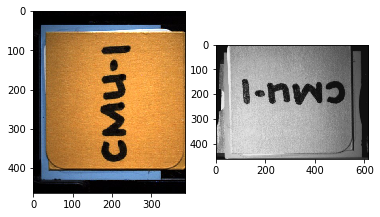

In [22]:
all_slides = core.get_slides(pma_core_slide_dir)
for sl in all_slides:
    print(core.get_barcode_url(sl))
plt.subplot(1, 2, 1)
plt.imshow(core.get_barcode_image(all_slides[0]))
plt.subplot(1, 2, 2)
plt.imshow(core.get_barcode_image(all_slides[1]))

example 210: thumbnail URL and image

In [23]:
all_slides = core.get_slides(pma_start_slide_dir)
for sl in all_slides:
    print(core.get_barcode_url(sl))
plt.subplot(1, 2, 1)
plt.imshow(core.get_barcode_image(all_slides[0]))
plt.subplot(1, 2, 2)
plt.imshow(core.get_barcode_image(all_slides[1]))

NameError: name 'pma_start_slide_dir' is not defined

example 220: retrieving individual tiles in PMA.core

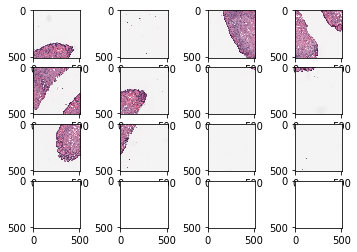

In [24]:
slides = core.get_slides(pma_core_slide_dir)
slide = slides[0]
for zl in range(0, core.get_max_zoomlevel(slide)):
    (x, y, tot) = core.get_number_of_tiles(slide, zl)
    if tot > 16 and x >= 4 and y >= 4:
        break
for i in range(1,17):
    plt.subplot(4, 4, i)
    xr = 1 + (i-1) % 4
    yr = int((i-1) / 4) + 1
    tile = core.get_tile(slide, xr, yr, zl)
    plt.imshow(tile)

example 230: searching for slides in PMA.core

In [25]:
slides = core.search_slides(pma_core_slide_dir, "mrxs")
pp.pprint(slides)

url = https://host.pathomation.com/sandbox/2/PMA.core/query/json/Filename?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases&pattern=mrxs
['hgx_cases/bladder/10440001B/HE_10440001B0001S.mrxs',
 'hgx_cases/bladder/10440001B/PanCK-CD8_10440001B0004S.mrxs',
 'hgx_cases/bladder/10440001B/PDL1_10440001B0002S.mrxs',
 'hgx_cases/bladder/10440001B/PDL1NC_10440001B0003S.mrxs',
 'hgx_cases/bladder/10440002B/HE_10440002B0001S.mrxs',
 'hgx_cases/bladder/10440002B/PanCK-CD8_10440002B0004S.mrxs',
 'hgx_cases/bladder/10440002B/PDL1_10440002B0002S.mrxs',
 'hgx_cases/bladder/10440002B/PDL1NC_10440002B0003S.mrxs',
 'hgx_cases/bladder/10440003B/HE_10440003B0001S.mrxs',
 'hgx_cases/bladder/10440003B/PanCK-CD8_10440003B0004S.mrxs',
 'hgx_cases/bladder/10440003B/PDL1_10440003B0002S.mrxs',
 'hgx_cases/bladder/10440003B/PDL1NC_10440003B0003S.mrxs',
 'hgx_cases/bladder/10440004B/HE_10440004B0001S.mrxs',
 'hgx_cases/bladder/10440004B/PanCK-CD8_10440004B0004S.mrxs',
 'hgx_cases/bladder/10440004B/PDL1_10440004B0002

example 240: search for folders in PMA.core

In [26]:
slides = core.search_slides(pma_core_slide_dir, "bladder")
pp.pprint(slides)

url = https://host.pathomation.com/sandbox/2/PMA.core/query/json/Filename?sessionID=K1bn7uUDjwAox_EYz6Cfyw2&path=hgx_cases&pattern=bladder
['hgx_cases/bladder/10440001B/HE_10440001B0001S.mrxs',
 'hgx_cases/bladder/10440001B/PanCK-CD8_10440001B0004S.mrxs',
 'hgx_cases/bladder/10440001B/PDL1_10440001B0002S.mrxs',
 'hgx_cases/bladder/10440001B/PDL1NC_10440001B0003S.mrxs',
 'hgx_cases/bladder/10440002B/HE_10440002B0001S.mrxs',
 'hgx_cases/bladder/10440002B/PanCK-CD8_10440002B0004S.mrxs',
 'hgx_cases/bladder/10440002B/PDL1_10440002B0002S.mrxs',
 'hgx_cases/bladder/10440002B/PDL1NC_10440002B0003S.mrxs',
 'hgx_cases/bladder/10440003B/HE_10440003B0001S.mrxs',
 'hgx_cases/bladder/10440003B/PanCK-CD8_10440003B0004S.mrxs',
 'hgx_cases/bladder/10440003B/PDL1_10440003B0002S.mrxs',
 'hgx_cases/bladder/10440003B/PDL1NC_10440003B0003S.mrxs',
 'hgx_cases/bladder/10440004B/HE_10440004B0001S.mrxs',
 'hgx_cases/bladder/10440004B/PanCK-CD8_10440004B0004S.mrxs',
 'hgx_cases/bladder/10440004B/PDL1_10440004B0